![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE PHYSICAL SOUTH AMERICA TRAINING

<div style="text-align: right"><i> 01-PHY-02 </i></div>

*Release date: June 2022*


<center><h1>How to visualize maps of vector currents</h1></center>

<div class="alert alert-block alert-warning">
    <h3>Before starting, read carefully the following execution notes</h3>
    <ul><li>
        Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play">
        </i></button> button from the icons menu above the notebook (otherwise press the keyboard shortcut `Shift` + `Enter`).
        </li>
    <li>
        If for any reason the notebook stops working, from the same menu click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the text menu above the icons one, click on "Cell" and select "Run All Above".
        </li></ul>
</div>

***

# Table of contents aggiornare post
- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
- [3. Download the data](#3.-Download-the-data)
- [4. Install the packages](#4.-Install-the-packages)
- [5. Explore the data](#5.-Explore-the-data)
- [6. Plot the data](#6.-Plot-the-data)
- [7. Conclusion](#7.-Conclusion) 
***

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

Several studies of the Malvinas current were performed in that area using GLO MFC products. 

For 2015, with a focus on the 41°S area and the confluence with the Brasil current: 
["Fronts of the Malvinas Current System: Surface and Subsurface Expressions Revealed by Satellite Altimetry, Argo Floats, and Mercator Operational Model Outputs"](https://doi.org/10.1029/2018JC013887) 

For 2011, with a focus on the 51°S area and the water masses in the southern part of the domain:
["Revisiting the Malvinas Current Upper Circulation and Water Masses Using a High-Resolution Ocean Reanalysis"](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JC017271).
 

Let's start by having a look at the surface currents in 2015

***

# 2. About the data

[Go back to the "Table of contents"](#Table-of-contents)

## Model description

### This example is based on the product: [GLOBAL_REANALYSIS_PHY_001_030](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION)

The GLORYS12V1 product is the CMEMS global ocean eddy-resolving (1/12° horizontal resolution, 50 vertical levels) reanalysis covering the altimetry (1993 onward).

It is based largely on the current real-time global forecasting CMEMS system. The model component is the NEMO platform driven at surface by ECMWF ERA-Interim then ERA5 reanalyses for recent years. Observations are assimilated by means of a reduced-order Kalman filter. Along track altimeter data (Sea Level Anomaly), Satellite Sea Surface Temperature, Sea Ice Concentration and In situ Temperature and Salinity vertical Profiles are jointly assimilated. Moreover, a 3D-VAR scheme provides a correction for the slowly-evolving large-scale biases in temperature and salinity.

This product includes daily and monthly mean files for temperature, salinity, currents, sea level, mixed layer depth and ice parameters from the top to the bottom. The global ocean output files are displayed on a standard regular grid at 1/12° (approximatively 8 km) and on 50 standard levels.

<img src="./img/GLOBAL_REANALYSIS_PHY_001_030_table1.png">

## Get more info on the product

1. You can find info on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION)
<br><br>
2. For **detailed information** about the product, please consult the **document**: [Product User Manual (PUM)](./docs/CMEMS-GLO-PUM-001-030.pdf)
<br><br>
3. For information about **the quality and validation** of the product, please consult the **document**: [Quality Information Document (QUID)](./docs/CMEMS-GLO-QUID-001-030.pdf)

***

# 3. Download the data

[Go back to the "Table of contents"](#Table-of-contents)

## Parameters used for downloading the data


| Parameter | Value |
| :---: | :---|
| **Product** | GLOBAL_MULTIYEAR_PHY_001_030 |
| **Dataset** | cmems_mod_glo_phy_my_0.083_P1M-m |
| **variables** | thetao, mlost, so, uo, vo|
| **Frequency** | monthly |
| **Lat min** | -56 |
| **Lat max** | -36 |
| **Lon min** | -65 |
| **Lon max** | -42 | 
| **Timesteps** | 2011-01, 2011-08, 2015-04, 2015-05 |
| **Depths** | from 0 to 1000 |
| **Service for downloading** | SUBSETTER |
| **Files total dimension** | ~100MB |

## How to download the products?

If you need some help about the different services for downloading the CMEMS products, please check this [tutorial](
https://help-cmems.mercator-ocean.fr/en/articles/4469993-how-to-download-copernicus-marine-data)

<div class="alert alert-block alert-warning">
    <b>Get the CMEMS User credentials</b>
<hr>
The data are already available in this notebook. But if you want to download the data by yourself, please be sure to have by your CMEMS User credentials. Otherwise please get them <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">here</a>.

## Install the *motuclient*

Data can be alternatively downloaded with **motuclient**, a multiplatform python script to automate extraction of information from the Marine Copernicus portal. To install motuclient:

```
!pip install motuclient==1.8.4 --no-cache-dir
```

Write the command below:

To get more info on motuclient visit the related [web page](https://help-cmems.mercator-ocean.fr/en/articles/4796533-what-are-the-motu-client-motuclient-and-python-requirements).

## Download the products

Using *motuclient* you'll be able to download data with the following command lines. 

*Consider that there is a different command line for each file that will be downloaded.*

You have to copy each line to another cell for being execute (**NOTE:** don't forget to set username and password!)

<div class="alert alert-block alert-info">
<b>Tip:</b> The same command lines can be used inside in your bash scripts. Of course you need to install the <i>motuclient</i>.
</div>

Set your CMEMS username and password:

In [3]:
config = {}
config["user"] = "USER"
config["pwd"] = "PASSWORD"

Utility function:

In [4]:
def get_motu_cmd(config, variables):
    cmd = list()
    for k,v in config.items():
        cmd.append("--{} '{}'".format(k, str(v)))
    cmd.append(" ".join(["--variable " + v for v in variables]))
    return "python -m motuclient " + " ".join(cmd) 

Basic configuration for download

In [5]:
OUT_DIR = "./data"
config["out-dir"] = OUT_DIR

Create the OUT_DIR if it doesn't exist:

In [6]:
import os
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR) 

Variables:

In [7]:
variables = ["uo", "vo"]

Dates:

In [ ]:
dates = ["2011-01-16 12:00:00", "2011-08-16 12:00:00", "2015-04-16 00:00:00", "2015-05-16 12:00:00"]

Configuration for the download:

In [ ]:
config.update({
    "service-id": "GLOBAL_MULTIYEAR_PHY_001_030-TDS",
    "product-id": "cmems_mod_glo_phy_my_0.083_P1M-m",
    "motu": "https://my.cmems-du.eu/motu-web/Motu",
    "longitude-min": -65,
    "longitude-max": -42,
    "latitude-min": -56,
    "latitude-max": -36,
    "depth-min": 0,
    "depth-max": 1000,
})

Execute the download of files:

In [ ]:
import subprocess

if not config["user"] == "USERNAME":
    for d in dates:
        config['date-min'] = config['date-max'] = d
        config["out-name"] = d[0:10] + ".nc"
        cmd_line = get_motu_cmd(config, variables)
        print("\n--- Command line for downloading the data for {}: ---\n".format(d))
        print(cmd_line, '\n')
        print("--- Start to download for {}: ---\n".format(d))
        subprocess.run(cmd_line,  shell=True)
else:
    print("Please insert your CMEMS username and password in the cell above if you want to downdload the files")

Check if the file were created... 

In [8]:
import glob
glob.glob(OUT_DIR + "/*.nc")

['./data/2015-04-16.nc',
 './data/2011-08-16.nc',
 './data/2015-05-16.nc',
 './data/2011-01-16.nc']

***

# 4. Install the packages

[Go back to the "Table of contents"](#Table-of-contents)

## Required modules

The following Python modules are needed for running the exercises:

| Module name | Description |
| :---: | :---|
| **os** | [ Miscellaneous operating system interfaces](https://docs.python.org/3.7/library/os.html) for managing paths, creating directories,... |
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |

## Modules installation

Install the needed Python modules.

**Requirement: Python version > 3.x**

Check your Python version:

In [7]:
!python --version

Python 3.8.8


If you are using the standard *Anaconda3* installation, you can install the needed modules executing the following command:

```
conda install xarray netcdf4 dask matplotlib cartopy numpy
```

Write the command in the following cell:

In [8]:
conda install xarray netcdf4 dask matplotlib cartopy numpy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


***

# 5. Explore the data

[Go back to the "Table of contents"](#Table-of-contents)

Create a dataset from the files:

In [31]:
import os
import glob
import xarray as xr
ds = xr.open_mfdataset(glob.glob("./data/*.nc"))

Open the dataset:

In [32]:
ds

<xarray.Dataset>
Dimensions:    (depth: 35, latitude: 241, time: 4, longitude: 277)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

Another way for getting info:

In [33]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (depth: 35, latitude: 241, time: 4, longitude: 277)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                      

About the coordinates:

In [34]:
ds.coords

Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0

About the variables:

In [35]:
ds.data_vars

Data variables:
    vo       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    uo       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    thetao   (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>

<div class="alert alert-block alert-info">
The dataset is a 3D dataset: it has depth levels!
</div>

Take a look at the time:

In [36]:
ds.time

<xarray.DataArray 'time' (time: 4)>
array(['2011-01-16T12:00:00.000000000', '2011-08-16T12:00:00.000000000',
       '2015-04-16T00:00:00.000000000', '2015-05-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
Attributes:
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    _CoordinateAxisType:  Time
    valid_min:            535092.0
    valid_max:            535092.0

Take a look at the depth levels:

In [37]:
ds.depth

<xarray.DataArray 'depth' (depth: 35)>
array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00, 5.078224e+00,
       6.440614e+00, 7.929560e+00, 9.572997e+00, 1.140500e+01, 1.346714e+01,
       1.581007e+01, 1.849556e+01, 2.159882e+01, 2.521141e+01, 2.944473e+01,
       3.443415e+01, 4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
       7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02, 1.558507e+02,
       1.861256e+02, 2.224752e+02, 2.660403e+02, 3.181274e+02, 3.802130e+02,
       4.539377e+02, 5.410889e+02, 6.435668e+02, 7.633331e+02, 9.023393e+02],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 541.1 643.6 763.3 902.3
Attributes:
    valid_min:               0.494025
    valid_max:               902.3393
    units:                   m
    positive:                down
    unit_long:               Meters
    long_name:               Depth
    standard_name:           depth
    axis:                    Z
    _ChunkSizes:             50
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

Get info about "Eastward Velocity" 3D field:

In [38]:
ds['uo']

<xarray.DataArray 'uo' (time: 4, depth: 35, latitude: 241, longitude: 277)>
dask.array<concatenate, shape=(4, 35, 241, 277), dtype=float32, chunksize=(1, 35, 241, 277), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0
Attributes:
    long_name:      Eastward velocity
    standard_name:  eastward_sea_water_velocity
    units:          m s-1
    unit_long:      Meters per second
    cell_methods:   area: mean
    _ChunkSizes:    [  1   7 341 720]

Get info about  "Northward Velocity" 3D field:

In [39]:
ds['vo']

<xarray.DataArray 'vo' (time: 4, depth: 35, latitude: 241, longitude: 277)>
dask.array<concatenate, shape=(4, 35, 241, 277), dtype=float32, chunksize=(1, 35, 241, 277), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0
Attributes:
    long_name:      Northward velocity
    standard_name:  northward_sea_water_velocity
    units:          m s-1
    unit_long:      Meters per second
    cell_methods:   area: mean
    _ChunkSizes:    [  1   7 341 720]

# 6. Plot the data

[Go back to the "Table of contents"](#Table-of-contents)

### Import the packages

For avoiding the warning messages during the execution and installation process, at first remove them:

In [40]:
import warnings
warnings.filterwarnings('ignore')

Import the packages:

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# from cartopy import config
import cartopy
import cartopy.crs as ccrs

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [42]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

### Configure the variables

In [43]:
## Set the coordinates names used in the netcdf (see: ds.coords)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

Do the same for the variables names (check the ds.data_vars outputs):

In [44]:
## Set the variable names
tem_name = "thetao"
uo_name = "uo"
vo_name = "vo"

### Configure the plot

Set the limits for the area: choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!):  

In [45]:
## Set lat-lon limits - FULL AREA
lat_min = ds[lat_name][0]
lat_max = ds[lat_name][-1]
lon_min = ds[lon_name][0]
lon_max = ds[lon_name][-1]

# ## Set lat-lon limits - CUSTOM AREA
# lon_min = -50
# lon_max = -42
# lat_min = -46
# lat_max = -36

In [46]:
## Set the lat/lon indexes
lats_idx = getRangeIndexes(ds[lat_name], lat_min, lat_max)
lons_idx = getRangeIndexes(ds[lon_name], lon_min, lon_max)
## Set lons, lats                                               
lons, lats = ds[lon_name][lons_idx], ds[lat_name][lats_idx]

Set the plot configuration for each variable to plot:

In [47]:
## Set the plot configuration for each variable to plot
variables_conf = {
    "uo":
        { 
          "min_max": [-0.5, 1.5], 
          "unit": "m/s",
          "cmap": "jet" 
        }
}

In [48]:
## Set the labels for the plot
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'

In [49]:
# Plot configuration
width_inch = 18
height_inch = 8

# Axes labels
title_size = 14

### Generate the maps

[]

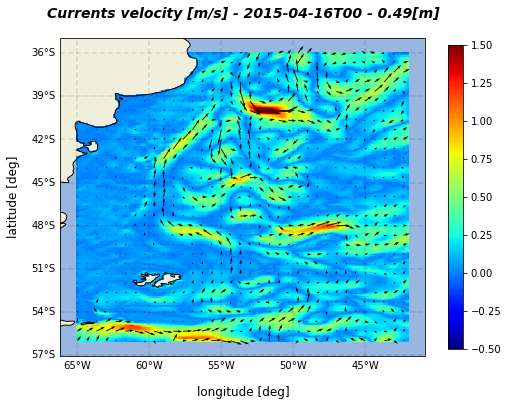

In [50]:
## Set figure
fig = plt.figure(figsize=(width_inch, height_inch))

## Add the plot 1
# add_subplot(1, 2, 2) means "1x2 grid, second subplot"
# add_subplot(2, 1, 2) means "2x1 grid, second subplot"
ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2015-04-16T00:00"
sel_depth = 0 # m
var_name = "uo"
uo_name = "uo"
vo_name = "vo"
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data for plotting
# directions
uo = ds[uo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
vo = ds[vo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var="Currents velocity",
                          unit=variables_conf[var_name]["unit"])

if (dataset_3D):
    uo = uo.sel(depth=sel_depth, method="nearest")
    vo = vo.sel(depth=sel_depth, method="nearest") 
    title += " - {depth:.2f}[m]".format(depth=uo.depth.data)
    
# Compute intensity
data_to_plot = (uo**2+uo**2) ** 0.5 

## Plot map and directions
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Filter
skip = 8
uo, vo = uo[::skip,::skip], vo[::skip,::skip]
lons_skp, lats_skp = uo[lon_name], uo[lat_name]

## Plot directions
ax.quiver(lons_skp, lats_skp, uo, vo, transform=ccrs.PlateCarree(), scale=20)

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.7)


## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN) # color ocean with color blue
ax.add_feature(cartopy.feature.LAND) # color lands with color beige


## Add grid
# draw_labels are the values of the grid in the plot border
# alpha is the color transparency of the grid start from min 0.1 to max 1 
# color is the color of the grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False # to not show the values grid on the top of the plot write False
gl.right_labels = False # to show the values grid on the right of the plot write False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=20)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

Look at the surface current changes from April 2015 to May 2015
 
The Malvinas Current at 41°S went through two distinct regimes in 2015 referred to as ‘‘weak Malvinas’’ (December 2014 and May–September 2015) and ‘‘strong Malvinas’’ (early January to mid-April 2015 and mid-September to the end of November 2015). The distinct regimes at 41°S can be identified in the in situ and PSY4 velocity components. During the ‘‘strong Malvinas’’ regime the Malvinas Current flows northward 41°S. During the “weak Malvinas” the Malvinas Current retroflects southward and the Brazil Current invades the 41°S section.

# Conclusion


<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### Now you know how to plot the Global physical model provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### To go further, you can try to visualize other variables and diagnostics (spatial or vertical averages, standard deviations...)

#### Hope you have enjoyed this session and let's do great science with our data.

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 


[Go back to the "Table of contents"](#Table-of-contents)